# Generating animated timeseries

**Notebook currently compatible with both the `NCI` and `DEA Sandbox` environments**


### Background


### Description
This notebook demonstrates how to 

### Technical details
* **Products used:** [`s2b_ard_granule`](http://explorer.sandbox.dea.ga.gov.au/s2b_ard_granule)
* **Analyses used:** Contour extraction, image processing, NDWI index, downloading data


## Getting started
To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages

In [43]:
%matplotlib inline

import sys
import datacube
from IPython.display import Image
# import numpy as np
# import xarray as xr
# import matplotlib as mpl
import matplotlib.pyplot as plt
# from affine import Affine
# from datacube.utils.geometry import CRS

sys.path.append('../Scripts')
from dea_plotting import animated_timeseries
from dea_datahandling import load_ard
from dea_datahandling import mostcommon_crs
# from dea_spatialtools import contour_extract
# from dea_bandindices import calculate_indices

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Connect to the datacube

In [33]:
dc = datacube.Datacube(app='Animated_timeseries')


## Load satellite data from datacube

In [102]:
# Set up a datacube query to load data for
query = {'x': (969476, 988476),
         'y': (-3568950, -3551951),
         'time': ('2015-01-01', '2017-01-01'),
         'crs': 'EPSG:3577',
         'measurements': ['nbart_red', 'nbart_green', 'nbart_blue'],
         'output_crs': 'EPSG:3577',
         'resolution': (-60, 60)}

# Load available data from all three Landsat satellites
landsat_ds = load_ard(dc=dc, 
                      products=['ga_ls8c_ard_3'], 
                      min_gooddata=0.99,
                      mask_pixel_quality=False,
                      group_by='solar_day',
                      **query)



Loading ga_ls8c_ard_3 data
    Filtering to 8 out of 46 observations
Combining and sorting data
    Masking out invalid values
    Returning 8 observations 


In [103]:
landsat_ds

<xarray.Dataset>
Dimensions:      (time: 8, x: 318, y: 284)
Coordinates:
  * y            (y) float64 -3.552e+06 -3.552e+06 ... -3.569e+06 -3.569e+06
  * x            (x) float64 9.694e+05 9.695e+05 ... 9.884e+05 9.885e+05
  * time         (time) datetime64[ns] 2015-01-22T00:20:21.686938 ... 2016-09-05T00:20:36.254614
Data variables:
    nbart_red    (time, y, x) float32 1095.0 1111.0 1050.0 ... 2080.0 2098.0
    nbart_green  (time, y, x) float32 835.0 792.0 739.0 ... 2736.0 1676.0 1740.0
    nbart_blue   (time, y, x) float32 591.0 543.0 497.0 ... 1917.0 1131.0 1138.0
Attributes:
    crs:      EPSG:3577

Generating 8 frame animation
    Exporting animation to animated_timeseries.gif


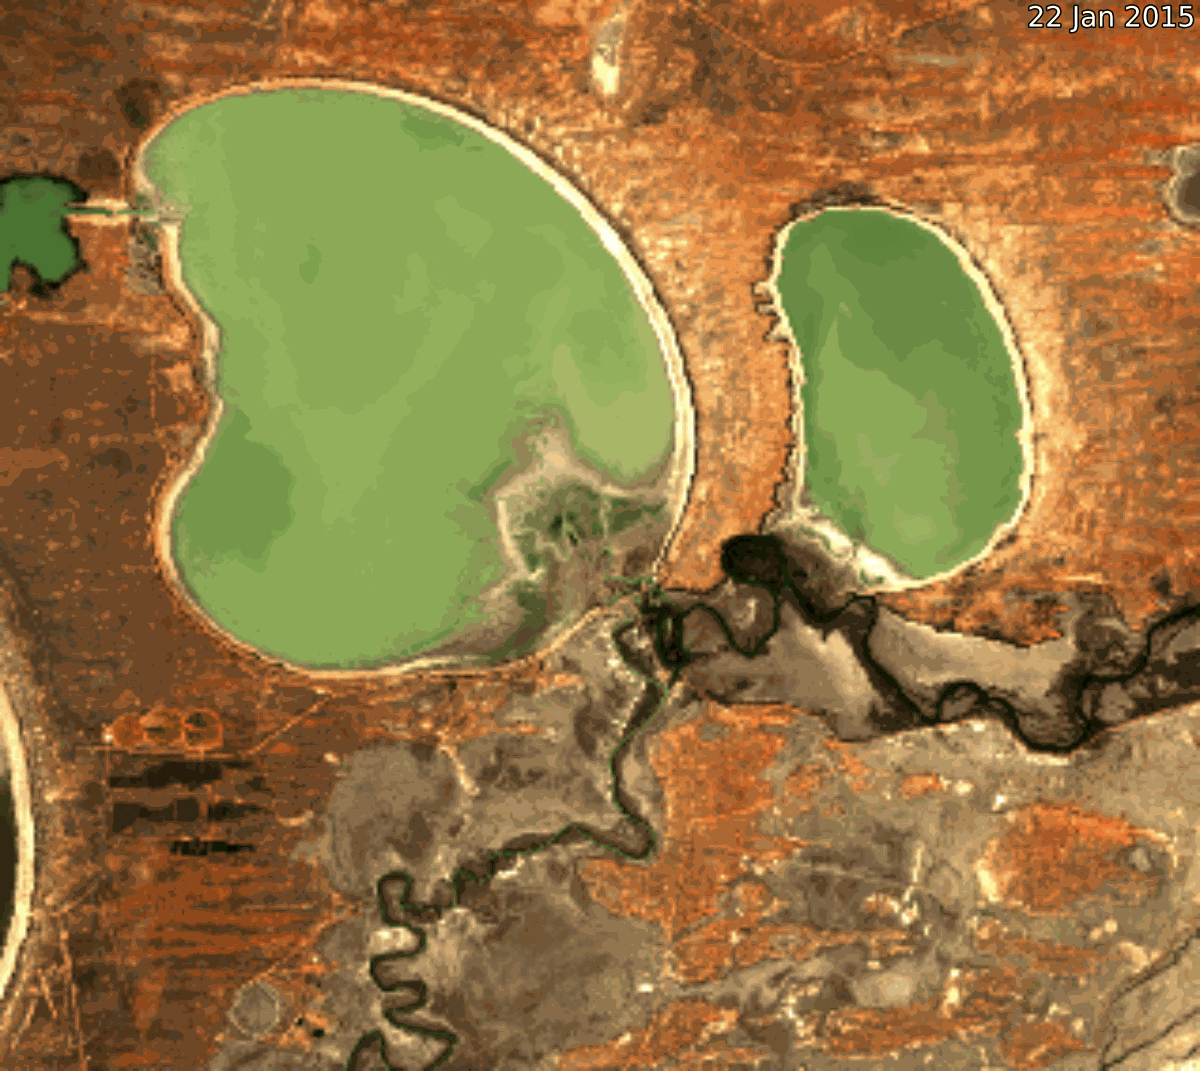

In [105]:
# Produce time series animation of red, green and blue bands
animated_timeseries(ds=landsat_ds, 
                    output_path='animated_timeseries.gif',                                
                    interval=200, 
                    width_pixels=1200) 

# Plot animated gif
plt.close()
Image(filename='animated_timeseries.gif')


## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** October 2019

**Compatible `datacube` version:** 

In [ ]:
print(datacube.__version__)

## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)